In [1]:
from keras import models
from keras.models import load_model

Using TensorFlow backend.


In [2]:
best_model = load_model(r'F:\SolarRadioBurst\测试通道归一化\Inception\Inception-Net_best.h5')
best_model.summary()

out_put = layer_outputs = [layer.output for layer in best_model.layers[-5:-4]]
activation_model = models.Model(inputs=best_model.input, outputs=layer_outputs)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400, 100, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 50, 64)  9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 100, 25, 64)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 100, 25, 64)  256         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [3]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
train_dir = r'G:\useful_C\test_C\normal3\dataset\train'
validation_dir = r'G:\useful_C\test_C\normal3\dataset\val'
test_dir = r'G:\useful_C\test_C\normal3\dataset\test'
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 1, 1, 1024))
    labels = np.zeros(shape=sample_count)
    generator = datagen.flow_from_directory(
    directory,
    target_size=(400, 100),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = activation_model.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

# 这里下面要填训练集的验证集图片的总数
train_features, train_labels = extract_features(train_dir, 559)
validation_features, validation_labels = extract_features(validation_dir, 176)
test_features, test_labels = extract_features(test_dir, 176)

Found 559 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [4]:
from keras import models
from keras import layers
from keras import optimizers

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='实验1.1_best.h5',monitor='val_acc',mode='auto' ,save_best_only='True')


model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels),
                    callbacks = [checkpoint]
                    )


Train on 559 samples, validate on 176 samples
Epoch 1/30
559/559 [==============================] - 0s 664us/step - loss: 0.6273 - acc: 0.8175 - val_loss: 0.1861 - val_acc: 0.9034
Epoch 2/30
559/559 [==============================] - 0s 417us/step - loss: 0.4500 - acc: 0.8730 - val_loss: 0.1551 - val_acc: 0.9261
Epoch 3/30
559/559 [==============================] - 0s 456u

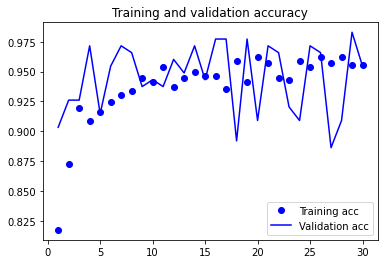

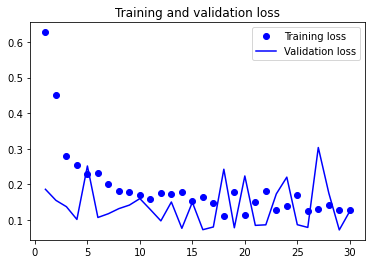

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [6]:
from keras.models import load_model

test_model = load_model(r'实验1.1_best.h5')
loss,acc = test_model.evaluate(test_features, test_labels)

print(loss, acc)



176/176 [==============================] - 0s 205us/step
0.05527271635153077 0.9829545617103577
